# Analysis of Presidential Speeches and Textual Insights

## **Introduction**
This project is designed to analyze a collection of presidential speeches.  
It involves several key stages:

### **1. Data Ingestion & Preprocessing:**  
- Reading text files containing speeches.  
- Cleaning the text (removing punctuation, extra spaces, and converting to lowercase).  
- Tokenizing the text into sentences and words.  

### **2. Exploratory Analysis:**  
- Computing the frequency distribution of words.  
- Calculating additional metrics such as average sentence length.  
- Visualizing sentence length distributions.  

### **3. Advanced NLP Tasks:**  
- Training **Word2Vec** models for word embeddings.  
- Finding words similar to key terms (e.g., *"freedom"*).  
- Sentiment analysis using NLTK’s **VADER** to gauge the emotional tone of the speeches.  

### **4. Comparative Analysis:**  
- Analyzing speeches from individual presidents (e.g., *Franklin D. Roosevelt*) or groups of presidents.  

### **5. Workflow & Output:**  
- The script prints intermediate results, and at the end, a final conclusion summarizes the major insights and interpretations.  

---

In [1]:
import os
import re
import gensim
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import spacy
nlp = spacy.load("en_core_web_sm")

In [2]:
# Download necessary NLTK datasets
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('vader_lexicon')

## Helper Functions Overview

This section details the key helper functions used in the project to process and analyze presidential speeches.

### 1. Reading and Cleaning Text
- **`read_file(file_name)`**  
  Reads a text file and returns its content as a string.  

- **`clean_text(text)`**  
  Cleans the given text by:
  - Removing punctuation and special characters.
  - Eliminating extra spaces.
  - Converting all text to lowercase for consistency.

### 2. Processing and Tokenization
- **`process_speeches(speeches)`**  
  Tokenizes speeches into sentences and words by:
  - Cleaning the text.
  - Splitting it into sentences.
  - Further breaking each sentence into words.

- **`merge_speeches(speeches)`**  
  Merges multiple speeches into a single list of sentences for easier analysis.

### 3. Speech Retrieval Functions
- **`get_president_sentences(president)`**  
  - Retrieves tokenized sentences from all speeches of a given president.
  - Looks for text files matching the president’s name.
  - Reads and processes the speeches.

- **`get_presidents_sentences(presidents)`**  
  - Similar to `get_president_sentences`, but works for multiple presidents.

### 4. Word Frequency Analysis
- **`most_frequent_words(sentences, n=20)`**  
  - Identifies the `n` most common words across all tokenized sentences.
  - Uses the `Counter` class to count word occurrences.

- **`most_frequent_meaningful_words(sentences, n=20)`**  
  - Identifies the `n` most frequent **meaningful** words.
  - Excludes common English stopwords (e.g., "the", "and", "is") using NLTK's `stopwords` list.

---
These functions form the backbone of text processing, allowing us to analyze presidential speeches effectively.


In [3]:
# Reads a text file and returns its content.
def read_file(file_name):
    with open(file_name, 'r', encoding='utf-8') as file:
        return file.read()

In [4]:
# Cleans text by removing special characters, multiple spaces, and converting to lowercase.
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation and special characters
    text = re.sub(r'\s+', ' ', text).strip()   # Remove extra spaces
    return text.lower()

In [5]:
# Tokenizes speeches into sentences and words
def process_speeches(speeches):
    tokenized_speeches = []
    for speech in speeches:
        cleaned_text = clean_text(speech)
        sentences = sent_tokenize(cleaned_text)
        word_tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]
        tokenized_speeches.append(word_tokenized_sentences)
    return tokenized_speeches

In [6]:
# Merges tokenized speeches into a single list of sentences
def merge_speeches(speeches):
    return [sentence for speech in speeches for sentence in speech]

In [7]:
# Retrieves tokenized sentences from speeches of a given president.
def get_president_sentences(president):
    files = sorted([file for file in os.listdir() if president.lower() in file.lower() and file.endswith('.txt')])
    speeches = [read_file(file) for file in files]
    return merge_speeches(process_speeches(speeches))

In [8]:
def get_presidents_sentences(presidents):
    """Retrieves tokenized sentences from speeches of multiple presidents."""
    return [sentence for president in presidents for sentence in get_president_sentences(president)]

In [9]:
# Finds the most common words in a list of tokenized sentences.
def most_frequent_words(sentences, n=20):
    words = [word for sentence in sentences for word in sentence]
    return Counter(words).most_common(n)

In [10]:
# nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Finds the most common words, excluding stopwords.
def most_frequent_meaningful_words(sentences, n=20):
    words = [word for sentence in sentences for word in sentence if word.lower() not in stop_words]
    return Counter(words).most_common(n)

In [11]:
# Trains a Word2Vec model with the given sentences.
def train_word2vec_model(sentences, vector_size=100, window=5, min_count=2, workers=4):
    return gensim.models.Word2Vec(sentences, vector_size=vector_size, window=window, min_count=min_count, workers=workers, sg=1)

In [12]:
# Analyzes sentiment of each sentence using NLTK's VADER.
def analyze_sentiment(sentences):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = [sia.polarity_scores(" ".join(sentence)) for sentence in sentences]
    
    # Compute average sentiment scores across all sentences
    avg_sentiment = {
        'neg': np.mean([score['neg'] for score in sentiment_scores]),
        'neu': np.mean([score['neu'] for score in sentiment_scores]),
        'pos': np.mean([score['pos'] for score in sentiment_scores]),
        'compound': np.mean([score['compound'] for score in sentiment_scores])
    }
    return avg_sentiment

### Main Script Execution

#### List all speech files in the current directory

In [14]:
files = sorted([file for file in os.listdir() if file.endswith('.txt')])
print("Speech files found:", files)

Speech files found: ['1793-Washington.txt', '1801-Jefferson.txt', '1861-Lincoln.txt', '1933-Franklin-D-Roosevelt.txt', '1937-Franklin-D-Roosevelt.txt', '1941-Franklin-D-Roosevelt.txt', '1945-Franklin-D-Roosevelt.txt']


#### Read each speech file

In [15]:
speeches = [read_file(file) for file in files]
print("Lets see the first speech:\n", speeches[0])

Lets see the first speech:
 Fellow citizens, I am again called upon by the voice of my country to execute the functions of its Chief Magistrate. When the occasion proper for it shall arrive, I shall endeavor to express the high sense I entertain of this distinguished honor, and of the confidence which has been reposed in me by the people of united America.

Previous to the execution of any official act of the President the Constitution requires an oath of office. This oath I am now about to take, and in your presence: That if it shall be found during my administration of the Government I have in any instance violated willingly or knowingly the injunctions thereof, I may (besides incurring constitutional punishment) be subject to the upbraidings of all who are now witnesses of the present solemn ceremony.

 



#### Preprocess each speech (cleaning & tokenization)

In [16]:
processed_speeches = process_speeches(speeches)
# Example: processed_speeches[0][0][0] is the first word of the first sentence of the first speech

After calling `process_speeches()` with `speeches` as an argument, the data will be formatted as follows:

- `processed_speeches[0]` → Represents the **first inaugural address** in `processed_speeches`.  
- `processed_speeches[0][0]` → Represents the **first sentence** in the **first inaugural address** in `processed_speeches`.  
- `processed_speeches[0][0][0]` → Represents the **first word** in the **first sentence** in the **first inaugural address** in `processed_speeches`.  


#### Merge all speeches into one list of sentences

In [17]:
all_sentences = merge_speeches(processed_speeches)
print("Total Number of Speeches used:", len(all_sentences))

Total Number of Speeches used: 7


#### View most frequently used words across all speeches

In [18]:
most_freq_words = most_frequent_words(all_sentences)
print("\nMost frequent words:", most_freq_words)


Most frequent words: [('the', 776), ('of', 582), ('and', 366), ('to', 358), ('in', 223), ('a', 197), ('that', 186), ('we', 151), ('it', 146), ('be', 134), ('is', 131), ('our', 127), ('i', 111), ('not', 99), ('by', 98), ('all', 88), ('have', 87), ('this', 84), ('for', 83), ('as', 77)]


#### Create a Word2Vec model from all sentences

In [19]:
all_prez_embeddings = train_word2vec_model(all_sentences, vector_size=96, window=5, min_count=1, workers=2)
# View words similar to 'freedom'
try:
    similar_to_freedom = all_prez_embeddings.wv.most_similar("freedom", topn=20)
    print("\nWords similar to 'freedom':", similar_to_freedom)
except KeyError:
    print("\nThe word 'freedom' was not found in the vocabulary.")


Words similar to 'freedom': [('made', 0.9985431432723999), ('new', 0.9985142946243286), ('through', 0.9984857439994812), ('right', 0.9984040856361389), ('does', 0.9983956813812256), ('today', 0.9983804225921631), ('are', 0.9983580708503723), ('you', 0.9983406066894531), ('political', 0.9983393549919128), ('power', 0.9983346462249756), ('still', 0.9983243942260742), ('authority', 0.9983219504356384), ('only', 0.9983198046684265), ('many', 0.9983046054840088), ('work', 0.9982998967170715), ('by', 0.9982975125312805), ('no', 0.9982664585113525), ('with', 0.9982662200927734), ('but', 0.9982543587684631), ('progress', 0.9982538819313049)]


#### Analysis for a specific president (e.g., Franklin D. Roosevelt)

In [20]:
roosevelt_sentences = get_president_sentences("franklin-d-roosevelt")
roosevelt_most_freq_words = most_frequent_words(roosevelt_sentences)

print("\nRoosevelt's most frequent words:", roosevelt_most_freq_words)
print("\nRoosevelt's most frequent meanignful words:", most_frequent_meaningful_words(roosevelt_sentences))


roosevelt_embeddings = train_word2vec_model(roosevelt_sentences, vector_size=96, window=5, min_count=1, workers=2)
try:
    roosevelt_similar_to_freedom = roosevelt_embeddings.wv.most_similar("freedom", topn=20)
    print("\nRoosevelt words similar to 'freedom':", roosevelt_similar_to_freedom)
except KeyError:
    print("\nThe word 'freedom' was not found in Roosevelt's vocabulary.")


Roosevelt's most frequent words: [('the', 377), ('of', 321), ('and', 178), ('to', 158), ('we', 131), ('a', 120), ('in', 119), ('that', 102), ('our', 90), ('it', 72), ('is', 67), ('have', 56), ('for', 47), ('not', 45), ('this', 41), ('be', 41), ('i', 40), ('by', 38), ('will', 36), ('as', 33)]

Roosevelt's most frequent meanignful words: [('nation', 26), ('people', 26), ('government', 22), ('us', 20), ('shall', 20), ('democracy', 20), ('men', 18), ('must', 17), ('know', 16), ('life', 15), ('spirit', 15), ('upon', 13), ('national', 12), ('years', 12), ('may', 12), ('world', 12), ('every', 11), ('new', 11), ('states', 11), ('good', 11)]

Roosevelt words similar to 'freedom': [('their', 0.9980757236480713), ('that', 0.9979607462882996), ('or', 0.9977210760116577), ('who', 0.9976893067359924), ('have', 0.9976819753646851), ('into', 0.9976814985275269), ('by', 0.997620165348053), ('a', 0.997618556022644), ('at', 0.9975979328155518), ('of', 0.9975970983505249), ('an', 0.9975830316543579), ('t

#### Comparative analysis for a group of presidents

In [21]:
rushmore_prez_sentences = get_presidents_sentences(["washington", "jefferson", "lincoln", "theodore-roosevelt"])
rushmore_most_freq_words = most_frequent_words(rushmore_prez_sentences)
print("\nMost frequent words (Washington, Jefferson, Lincoln, Theodore Roosevelt):", rushmore_most_freq_words)
rushmore_embeddings = train_word2vec_model(rushmore_prez_sentences, vector_size=96, window=5, min_count=1, workers=2)
try:
    rushmore_similar_to_freedom = rushmore_embeddings.wv.most_similar("freedom", topn=20)
    print("\nWords similar to 'freedom' (group analysis):", rushmore_similar_to_freedom)
except KeyError:
    print("\nThe word 'freedom' was not found in the group vocabulary.")


Most frequent words (Washington, Jefferson, Lincoln, Theodore Roosevelt): [('the', 399), ('of', 261), ('to', 200), ('and', 188), ('in', 104), ('be', 93), ('that', 84), ('a', 77), ('it', 74), ('i', 71), ('is', 64), ('by', 60), ('all', 55), ('not', 54), ('which', 44), ('as', 44), ('this', 43), ('or', 41), ('with', 40), ('will', 39)]

Words similar to 'freedom' (group analysis): [('can', 0.9960426688194275), ('it', 0.9958017468452454), ('them', 0.995782196521759), ('while', 0.99571692943573), ('think', 0.9957135319709778), ('constitution', 0.9956380128860474), ('and', 0.9955600500106812), ('other', 0.9955339431762695), ('these', 0.9955189228057861), ('the', 0.9955078959465027), ('may', 0.9954887628555298), ('are', 0.9954823851585388), ('principle', 0.9954598546028137), ('as', 0.995421290397644), ('state', 0.9954193830490112), ('law', 0.9954063892364502), ('never', 0.9953933358192444), ('for', 0.9953758120536804), ('to', 0.9953690767288208), ('of', 0.9953680038452148)]


#### Sentiment Analysis for all speeches

In [22]:
overall_sentiment = analyze_sentiment(all_sentences)
print("\nOverall sentiment scores for all speeches collected here:", overall_sentiment)


Overall sentiment scores for all speeches collected here: {'neg': 0.082, 'neu': 0.7484285714285714, 'pos': 0.16985714285714287, 'compound': 0.9381999999999999}


#### Sentiment Analysis for Roosvelt speeches

In [23]:
# Step 9: Sentiment Analysis for all speeches
overall_sentiment = analyze_sentiment(roosevelt_sentences)
print("\nOverall sentiment scores for Roosvelts speeches:", overall_sentiment)


Overall sentiment scores for Roosvelts speeches: {'neg': 0.08375, 'neu': 0.72875, 'pos': 0.188, 'compound': 0.999125}


#### Bonus: Caluclating and ploting average lenght of speeches


Plotting sentence length distribution...
Average sentence length: 1581.43 words


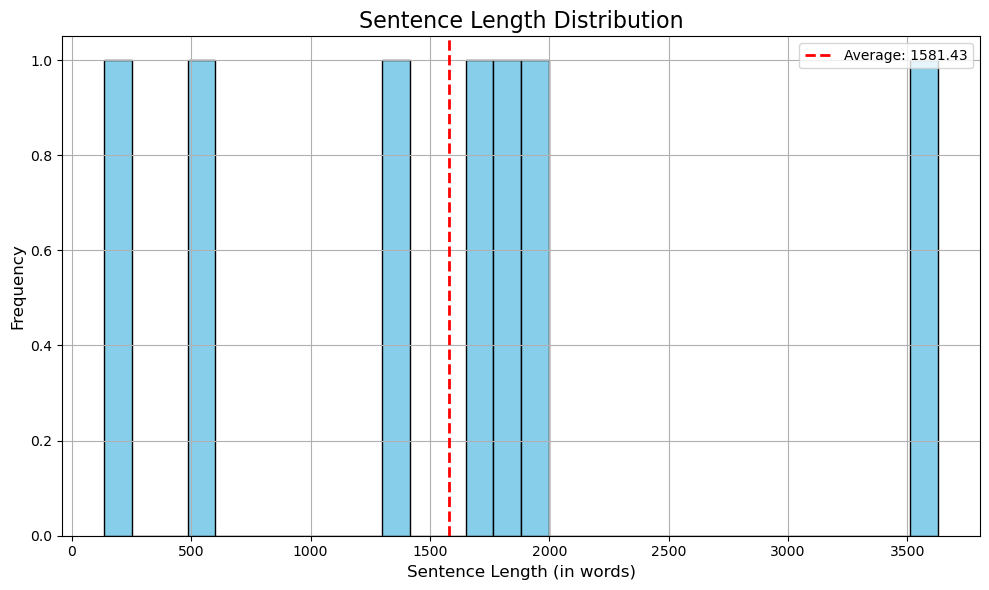

In [25]:
# Calculates and returns the distribution of sentence lengths (in words)
def sentence_length_distribution(sentences):
    sentence_lengths = [len(sentence) for sentence in sentences]
    return sentence_lengths

# Plotting the sentence length distribution with enhanced features
print("\nPlotting sentence length distribution...")

# Get the sentence lengths
sentence_lengths = sentence_length_distribution(all_sentences)

# Calculate and print average sentence length
average_length = np.mean(sentence_lengths)
print(f"Average sentence length: {average_length:.2f} words")

# Plot
plt.figure(figsize=(10, 6))
plt.hist(sentence_lengths, bins=30, color='skyblue', edgecolor='black')
plt.axvline(average_length, color='red', linestyle='dashed', linewidth=2, label=f'Average: {average_length:.2f}')
plt.title('Sentence Length Distribution', fontsize=16)
plt.xlabel('Sentence Length (in words)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## **Conclusion**
At the end of the analysis, we extract major insights:

### **1. Frequent Word Analysis:**  
- The frequency distribution reveals recurring themes across presidential speeches.  
- Key words such as **"freedom"** and **"nation"** appear prominently, indicating thematic importance of this historical figures

### **2. Word Embedding Insights:**  
- **Word2Vec** models provide context for key concepts.  
- Similarity analyses (*e.g., words related to "freedom"*) help uncover semantic relationships.  

### **3. Sentiment Analysis:**  
- Overall sentiment analysis suggests the general emotional tone across speeches.  
- Such insights can be linked to historical contexts or rhetorical strategies.  

### **4. Statistical and Visual Analysis:**  
- The **sentence length distribution** indicates variability in speech structure.  
- **Average sentence length metrics** provide an overview of communication style.  

---

This structured analysis helps in understanding the linguistic and thematic evolution of presidential speeches over time.